In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Heart Disease.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#checking for missing values
data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
# Handle missing values
data = data.fillna(data.mean())

# Prepare features and target
X = data.drop(['HeartDisease', 'education'], axis=1)
y = data['HeartDisease']

In [ ]:
# Convert categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)
X.shape

(4238, 14)

In [ ]:

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def accuracy(y_true, y_pred):
    return np.mean(y_true == (y_pred >= 0.5).astype(int))

In [ ]:
def logistic_regression_bgd(X, y, learning_rate, num_iterations):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iterations):
        # Forward pass
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Compute training loss and accuracy
        train_loss = cross_entropy_loss(y, y_pred)
        train_accuracy = accuracy(y, y_pred)

        # Compute validation loss and accuracy
        val_pred = sigmoid(np.dot(X_val_scaled, weights) + bias)
        val_loss = cross_entropy_loss(y_val, val_pred)
        val_accuracy = accuracy(y_val, val_pred)

        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                  f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
# Train the model
learning_rate = 0.01
num_iterations = 2500
weights, bias, train_losses, val_losses, train_accuracies, val_accuracies = logistic_regression_bgd(
    X_train_scaled, y_train, learning_rate, num_iterations)


# Evaluate on test set
test_pred = sigmoid(np.dot(X_test_scaled, weights) + bias)
test_loss = cross_entropy_loss(y_test, test_pred)
test_accuracy = accuracy(y_test, test_pred)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Iteration 0: Train Loss: 0.6931, Val Loss: 0.6917, Train Accuracy: 0.1527, Val Accuracy: 0.7987
Iteration 100: Train Loss: 0.5819, Val Loss: 0.5847, Train Accuracy: 0.8378, Val Accuracy: 0.8349
Iteration 200: Train Loss: 0.5175, Val Loss: 0.5219, Train Accuracy: 0.8412, Val Accuracy: 0.8491
Iteration 300: Train Loss: 0.4771, Val Loss: 0.4822, Train Accuracy: 0.8466, Val Accuracy: 0.8569
Iteration 400: Train Loss: 0.4506, Val Loss: 0.4561, Train Accuracy: 0.8496, Val Accuracy: 0.8538
Iteration 500: Train Loss: 0.4324, Val Loss: 0.4383, Train Accuracy: 0.8500, Val Accuracy: 0.8522
Iteration 600: Train Loss: 0.4197, Val Loss: 0.4258, Train Accuracy: 0.8513, Val Accuracy: 0.8538
Iteration 700: Train Loss: 0.4105, Val Loss: 0.4169, Train Accuracy: 0.8523, Val Accuracy: 0.8538
Iteration 800: Train Loss: 0.4037, Val Loss: 0.4104, Train Accuracy: 0.8520, Val Accuracy: 0.8553
Iteration 900: Train Loss: 0.3986, Val Loss: 0.4056, Train Accuracy: 0.8520, Val Accuracy: 0.8553
Iteration 1000: Train 

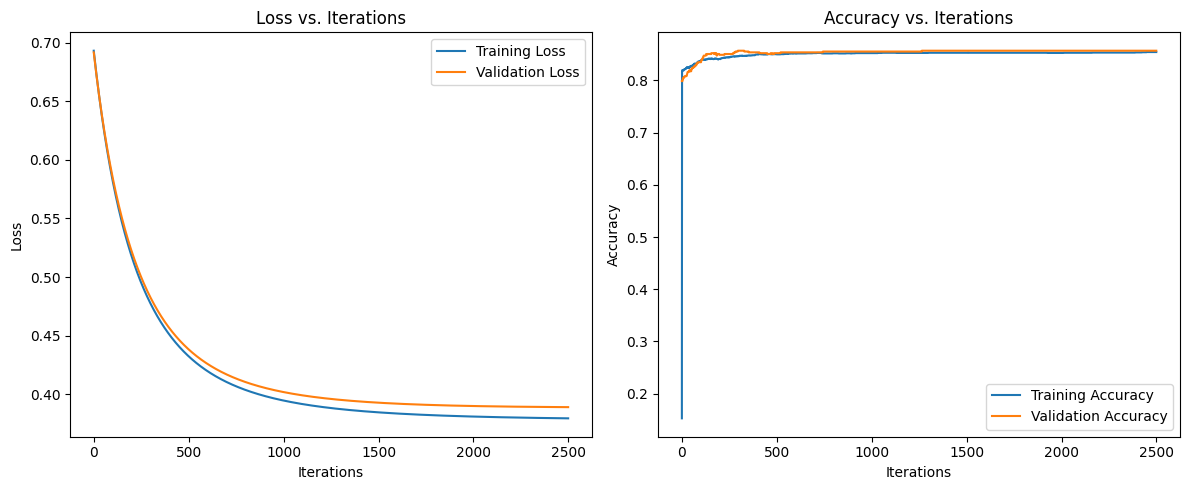

In [ ]:
# Plot training and validation losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.legend()

# Plot training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iterations')
plt.legend()

plt.tight_layout()
plt.show()

**Analysis of the results**

---



1. **Convergence of the Model** :- The loss
plots shot that the model is converging. We can see that Both training and Validation losses decrease after few hundred iterations and then start to stabilize. This is an indication that the model is learning from the data.

2. **Comparison of training and validation metrics** :-

*   Loss : The training loss decreases more rapidly and reaches a lower value as compared to the validation loss. This is expected as the model is optimizing for the training data.
*   Accuracy : Both the training and validation accuracies increses over time, which is a good sign. The training accuracy is slightly higher than the validation accuracy which is expected.





**PART B**

In [ ]:
# Implement Min-Max scaling from scratch
def min_max_scale(X):
    X_scaled = X.copy()
    for column in X_scaled.columns:
        X_scaled[column] = (X_scaled[column] - X_scaled[column].min()) / (X_scaled[column].max() - X_scaled[column].min())
    return X_scaled

In [ ]:
# Apply different scaling methods
X_train_minmax = min_max_scale(X_train)
X_val_minmax = min_max_scale(X_val)
X_test_minmax = min_max_scale(X_test)

# No scaling
X_train_no_scale = X_train
X_val_no_scale = X_val
X_test_no_scale = X_test


In [ ]:
def sigmoid_b(z):
    # Clip z to avoid overflow
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss_b(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
def logistic_regression_b(X, y, X_val, y_val, learning_rate, num_iterations):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    train_losses = []
    val_losses = []

    for i in range(num_iterations):
        # Forward pass
        z = np.dot(X, weights) + bias
        y_pred = sigmoid_b(z)

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Compute training loss
        train_loss = cross_entropy_loss_b(y, y_pred)

        # Compute validation loss
        val_pred = sigmoid_b(np.dot(X_val, weights) + bias)
        val_loss = cross_entropy_loss_b(y_val, val_pred)

        # Store losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return weights, bias, train_losses, val_losses

In [ ]:
# Train models with different scaling methods
learning_rate = 0.01
num_iterations = 1000
learning_rate_no_scale = 0.0001

# Min-Max scaling
print("min-max scaling ...............")
weights_minmax, bias_minmax, train_losses_minmax, val_losses_minmax = logistic_regression_b(
    X_train_minmax.values, y_train, X_val_minmax.values, y_val, learning_rate, num_iterations)

# No scaling
print()
print("no scaling ...........................")
weights_no_scale, bias_no_scale, train_losses_no_scale, val_losses_no_scale = logistic_regression_b(
    X_train_no_scale.values, y_train, X_val_no_scale.values, y_val, learning_rate_no_scale, num_iterations)


min-max scaling ...............
Iteration 0: Train Loss: 0.6931, Val Loss: 0.6907
Iteration 100: Train Loss: 0.5455, Val Loss: 0.5436
Iteration 200: Train Loss: 0.4925, Val Loss: 0.4920
Iteration 300: Train Loss: 0.4702, Val Loss: 0.4710
Iteration 400: Train Loss: 0.4594, Val Loss: 0.4613
Iteration 500: Train Loss: 0.4534, Val Loss: 0.4560
Iteration 600: Train Loss: 0.4495, Val Loss: 0.4529
Iteration 700: Train Loss: 0.4468, Val Loss: 0.4506
Iteration 800: Train Loss: 0.4446, Val Loss: 0.4489
Iteration 900: Train Loss: 0.4427, Val Loss: 0.4474

no scaling ...........................
Iteration 0: Train Loss: 0.6931, Val Loss: 0.5656
Iteration 100: Train Loss: 0.4344, Val Loss: 0.4342
Iteration 200: Train Loss: 0.4293, Val Loss: 0.4284
Iteration 300: Train Loss: 0.4259, Val Loss: 0.4241
Iteration 400: Train Loss: 0.4234, Val Loss: 0.4209
Iteration 500: Train Loss: 0.4216, Val Loss: 0.4184
Iteration 600: Train Loss: 0.4203, Val Loss: 0.4165
Iteration 700: Train Loss: 0.4193, Val Loss: 0.4

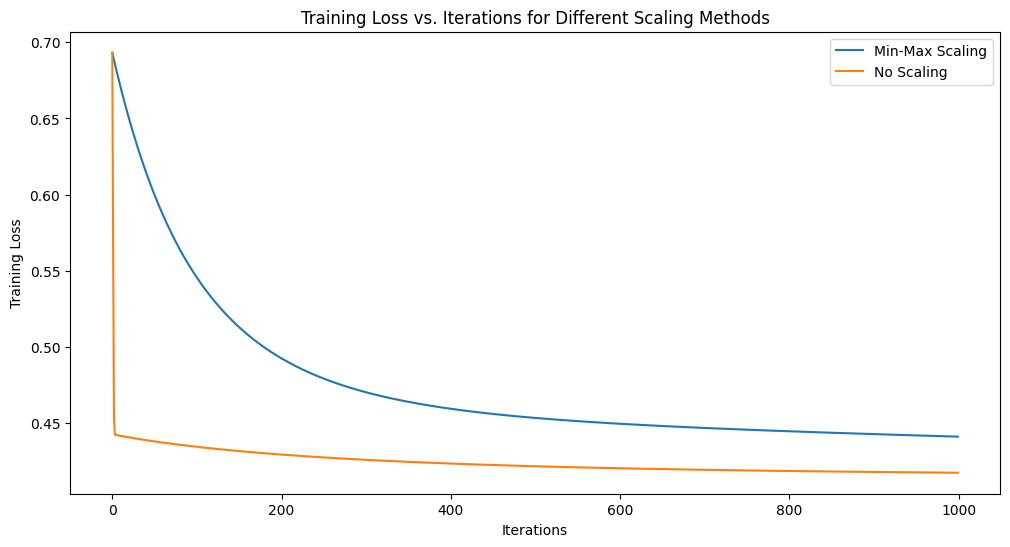

In [ ]:
# Plot training losses for different scaling methods
plt.figure(figsize=(12, 6))
plt.plot(train_losses_minmax, label='Min-Max Scaling')
plt.plot(train_losses_no_scale, label='No Scaling')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iterations for Different Scaling Methods')
plt.legend()
plt.show()

**Observations**

---



1.   **Min-Max Scaling (Blue Curve)** : we can see that the loss decreases steadily, and convergence is achieved over time.
2.  **No Scaling (Orange Curve)** : Here we can see that the loss decreases sharply early in the training of the model, but it flattens sooner than scaled version.



---
**General Observation on Feature Scaling :**

*   In gradient-based algorithms like logistic regression, feature scaling is critical for improving the convergence speed and stability. It helps prevent large differences in feature ranges from causing inefficient or biased gradient updates.
*   Without scaling, the model can converge prematurely to a suboptimal solution, as we can also see here in the case of no scaling, the loss converges faster, which is an indication of poor generalization.



Thus we can say that Min-Max scaling leads to a more stable and consitent convergence, ensuring model reaches a better solution after sufficient iterations. Also we can conclude by saying that scaling features tends to improve the overall model convergance and its performance, making it an essential step during the preprocessing of the data.








**PART C**

In [ ]:
print(data['HeartDisease'].value_counts())


HeartDisease
0    3594
1     644
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
y_true = y_val
y_pred = sigmoid_b(np.dot(X_val_scaled, weights) + bias)
y_pred = (y_pred >= 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[537   2]
 [ 89   8]]


In [ ]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8
Recall: 0.08247422680412371
F1 Score: 0.14953271028037382


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_true, y_pred)
print(f"ROC-AUC Score: {roc_auc}")


ROC-AUC Score: 0.5393818258324885


**Comment on how these metrics provide insight into the model’s
performance.**

---


1.   **Precision (0.8) :** This indicates that the 80% of the positive predictions made by the model are correct. High precision means whenever my model predicts a positive class, usually it is correct.
2.   **Recall (0.082) :** The recall score i've got is quite low, meaning that the model only correctly identifies about 8.2% of the actual positive cases.
3. **F1 Score (0.150) :** The F1 Score is the harmonic mean of precision and recall. Since the recall is low, the F1 score is also low, indicating a balance between precision and recall is not optimal. This means that model fails to predict positive cases while maintaining precision.
4. **ROC-AUC Score(0.54) :** The roc score measures the model's ability to distinguish between classes. A score of 0.5 indicates random guessing, thus a score of 0.54 is only slightly better than random. This means that the model's overall ability to differentiate between positive and negative classes is weak.




**PART D**

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == (y_pred >= 0.5).astype(int))


def stochastic_gradient_descent(X, y, X_val, y_val, learning_rate, num_iterations):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for i in range(num_iterations):
        for j in range(m):
            # Select a random sample
            idx = np.random.randint(0, m)
            xi, yi = X[idx:idx+1], y[idx:idx+1]

            # Forward pass
            y_pred = sigmoid_b(np.dot(xi, weights) + bias)

            # Compute gradients
            dw = np.dot(xi.T, (y_pred - yi))
            db = np.sum(y_pred - yi)

            # Update parameters
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Compute metrics for the entire dataset
        y_pred_train = sigmoid_b(np.dot(X, weights) + bias)
        y_pred_val = sigmoid_b(np.dot(X_val, weights) + bias)

        train_loss = cross_entropy_loss(y, y_pred_train)
        val_loss = cross_entropy_loss(y_val, y_pred_val)
        train_acc = accuracy(y, y_pred_train)
        val_acc = accuracy(y_val, y_pred_val)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        if i % 10 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                  f"Train Accuracy: {train_acc:.4f}, Val Accuracy: {val_acc:.4f}")

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
def mini_batch_gradient_descent(X, y, X_val, y_val, learning_rate, num_iterations, batch_size):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for i in range(num_iterations):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size):
            # Get mini-batch
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            # Forward pass
            y_pred = sigmoid_b(np.dot(X_batch, weights) + bias)

            # Compute gradients
            dw = (1/batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1/batch_size) * np.sum(y_pred - y_batch)

            # Update parameters
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Compute metrics for the entire dataset
        y_pred_train = sigmoid_b(np.dot(X, weights) + bias)
        y_pred_val = sigmoid_b(np.dot(X_val, weights) + bias)

        train_loss = cross_entropy_loss(y, y_pred_train)
        val_loss = cross_entropy_loss(y_val, y_pred_val)
        train_acc = accuracy(y, y_pred_train)
        val_acc = accuracy(y_val, y_pred_val)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        if i % 10 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                  f"Train Accuracy: {train_acc:.4f}, Val Accuracy: {val_acc:.4f}")

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
# Training parameters
learning_rate = 0.01
num_iterations = 150

# Stochastic Gradient Descent
print("for stochastic gradient descent..........\n")
weights_sgd, bias_sgd, train_losses_sgd, val_losses_sgd, train_accuracies_sgd, val_accuracies_sgd = stochastic_gradient_descent(
    X_train.values, y_train, X_val.values, y_val, learning_rate, num_iterations)

# Mini-Batch Gradient Descent (batch size = 32)
print("\nfor mini batch gradient descent batch size 32..........\n")
weights_mbgd_32, bias_mbgd_32, train_losses_mbgd_32, val_losses_mbgd_32, train_accuracies_mbgd_32, val_accuracies_mbgd_32 = mini_batch_gradient_descent(
    X_train.values, y_train.values, X_val.values, y_val.values, learning_rate, num_iterations, batch_size=32)

# Mini-Batch Gradient Descent (batch size = 64)
print("\n\nfor mini batch gradient descent batch size 64..........\n")
weights_mbgd_64, bias_mbgd_64, train_losses_mbgd_64, val_losses_mbgd_64, train_accuracies_mbgd_64, val_accuracies_mbgd_64 = mini_batch_gradient_descent(
    X_train.values, y_train.values, X_val.values, y_val.values, learning_rate, num_iterations, batch_size=64)

#The .values attribute converts the Pandas Series to NumPy arrays, enabling integer-based indexing.

for stochastic gradient descent..........

Iteration 0: Train Loss: 5.6297, Val Loss: 5.4101, Train Accuracy: 0.8233, Val Accuracy: 0.8318
Iteration 10: Train Loss: 5.7549, Val Loss: 5.4000, Train Accuracy: 0.8250, Val Accuracy: 0.8381
Iteration 20: Train Loss: 5.9541, Val Loss: 5.8287, Train Accuracy: 0.8200, Val Accuracy: 0.8208
Iteration 30: Train Loss: 29.2643, Val Loss: 29.2717, Train Accuracy: 0.1527, Val Accuracy: 0.1525
Iteration 40: Train Loss: 5.2635, Val Loss: 5.2134, Train Accuracy: 0.8476, Val Accuracy: 0.8491
Iteration 50: Train Loss: 13.7537, Val Loss: 13.9992, Train Accuracy: 0.5715, Val Accuracy: 0.5535
Iteration 60: Train Loss: 5.2635, Val Loss: 5.2677, Train Accuracy: 0.8476, Val Accuracy: 0.8475
Iteration 70: Train Loss: 5.9295, Val Loss: 5.3337, Train Accuracy: 0.8142, Val Accuracy: 0.8302
Iteration 80: Train Loss: 5.2751, Val Loss: 5.2677, Train Accuracy: 0.8473, Val Accuracy: 0.8475
Iteration 90: Train Loss: 5.2519, Val Loss: 5.2677, Train Accuracy: 0.8479, Val A

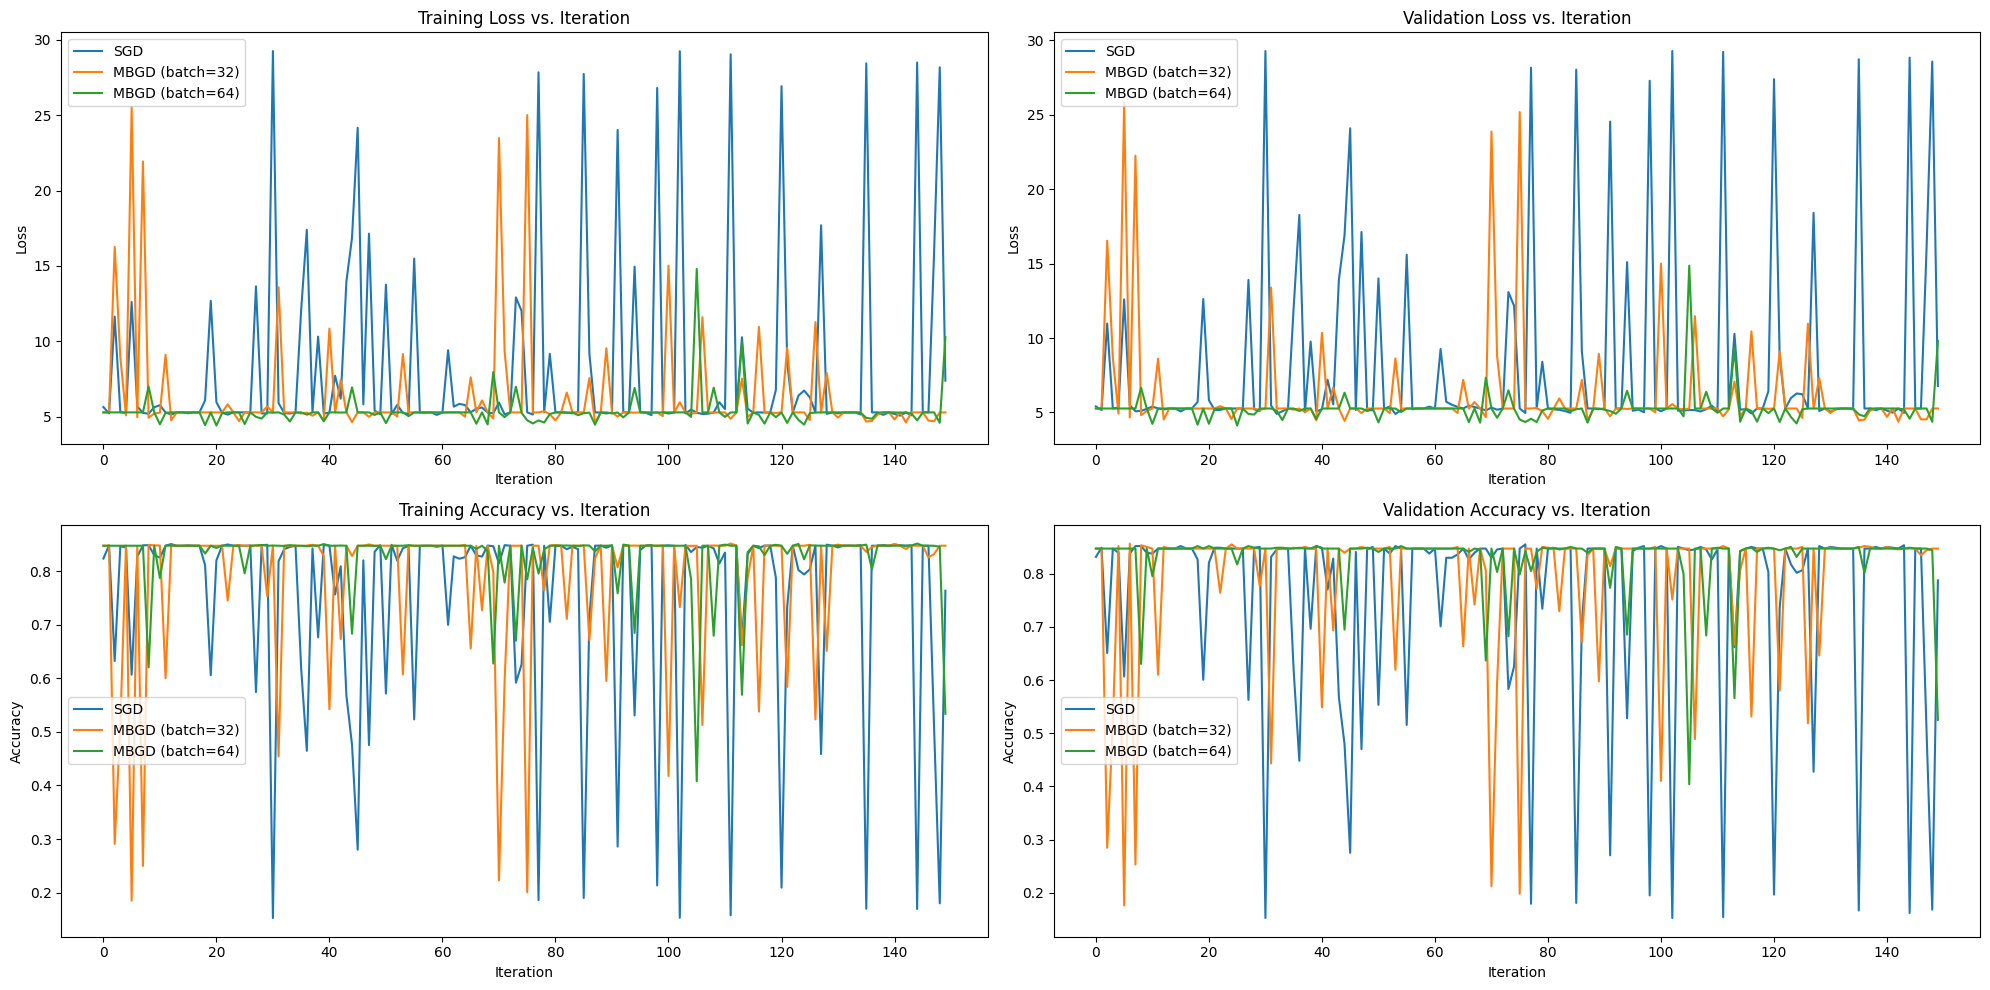

In [ ]:
# Plotting
plt.figure(figsize=(20, 10))

# Loss vs. Iteration
plt.subplot(2, 2, 1)
plt.plot(train_losses_sgd, label='SGD')
plt.plot(train_losses_mbgd_32, label='MBGD (batch=32)')
plt.plot(train_losses_mbgd_64, label='MBGD (batch=64)')
plt.title('Training Loss vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(val_losses_sgd, label='SGD')
plt.plot(val_losses_mbgd_32, label='MBGD (batch=32)')
plt.plot(val_losses_mbgd_64, label='MBGD (batch=64)')
plt.title('Validation Loss vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Accuracy vs. Iteration
plt.subplot(2, 2, 3)
plt.plot(train_accuracies_sgd, label='SGD')
plt.plot(train_accuracies_mbgd_32, label='MBGD (batch=32)')
plt.plot(train_accuracies_mbgd_64, label='MBGD (batch=64)')
plt.title('Training Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(val_accuracies_sgd, label='SGD')
plt.plot(val_accuracies_mbgd_32, label='MBGD (batch=32)')
plt.plot(val_accuracies_mbgd_64, label='MBGD (batch=64)')
plt.title('Validation Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Discuss the trade-offs in terms of convergence speed and stability
between these methods.**

---

1. **Convergence Speed :** Here in the plots we can see that the SGD shows the fastest initial progress, as it updates parameters more frequently. Whereas MBGD converges slower than SGD.

2. **Stability :** SGD's updates are noisy, which can help escape local minima but may never 'settle' at the global minimum. Whereas MBGD offers a balance, reducing noise compared to SGD.

In the plots we can see that the SGD shows more oscillations in both loss and accuracy curves, whereas MBGD with larger batch size (64) have a more smoother curve as compared to SGD and MBGD with small batch size (32).

**PART E**

In [ ]:
def logistic_regression_e(X, y, learning_rate, num_iterations):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for i in range(num_iterations):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid_b(z)

        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

def k_fold_cross_validation(X, y, k, learning_rate, num_iterations):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies, precisions, recalls, f1_scores = [], [], [], []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train the model
        weights, bias = logistic_regression_e(X_train, y_train, learning_rate, num_iterations)

        # Predict on validation set
        y_pred = sigmoid_b(np.dot(X_val, weights) + bias)
        y_pred_class = (y_pred >= 0.5).astype(int)

        # Calculate metrics
        accuracies.append(accuracy(y_val, y_pred_class))
        precisions.append(precision_score(y_val, y_pred_class))
        recalls.append(recall_score(y_val, y_pred_class))
        f1_scores.append(f1_score(y_val, y_pred_class))

    return accuracies, precisions, recalls, f1_scores


In [ ]:
k = 5
learning_rate = 0.01
num_iterations = 2500

accuracies, precisions, recalls, f1_scores = k_fold_cross_validation(X.values, y.values, k, learning_rate, num_iterations)

print(f"Average Accuracy: {np.mean(accuracies):.4f}, Std Dev: {np.std(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}, Std Dev: {np.std(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}, Std Dev: {np.std(recalls):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}, Std Dev: {np.std(f1_scores):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average Accuracy: 0.8285, Std Dev: 0.0421
Average Precision: 0.1894, Std Dev: 0.2775
Average Recall: 0.0880, Std Dev: 0.1258
Average F1 Score: 0.0943, Std Dev: 0.1176


**Discuss the stability and variance of the
model’s performance across different folds.**

---

These metrics provide the insights into the stability and variance of the model's performance across different folds in cross-validation:
1. **Average Accuracy (0.83, Std Dev - 0.042) :** The average accuracy is relatively high, which suggests that the model performs well overall. The Std dev is also low, suggesting that model's accuracy is consistent across different folds.
2. **Average Precision(0.19, Std Dev - 0.28) :** The avg precision score is quite low, and the high std deviation indicates significant vatiation in precision across different folds. This tells that the model's ability to correctly identify positive instances varies considerably depending on the fold.
3. **Average Recall (0.089, Std Dev - 0.123) :** The average recall is very low, indicating that the model misses many positive instances. The std deviation is also high suggesting that recall varies significantly across folds.
4. **Average F1 Score (0.094, Std Dev - 0.117) :** The F1 score, which balances precision and recall, is low on average. The high std deviation shows that the f1 score the balance between precision and recall across different folds is incosistent.

**PART F**

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
# Gradient Descent with L1 and L2 regularization
def gradient_descent(X, y, learning_rate=0.01, epochs=1000, lambda_l1=0.0, lambda_l2=0.0, early_stopping=False, patience=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    best_weights = None
    best_bias = None
    best_loss = np.inf
    patience_counter = 0

    training_losses = []
    validation_losses = []

    for epoch in range(epochs):
        # Linear model
        z = np.dot(X, weights) + bias
        y_pred = sigmoid_b(z)

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + lambda_l2 * weights + lambda_l1 * np.sign(weights)
        db = (1 / n_samples) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Training loss (Log-Loss)
        train_loss = log_loss(y, y_pred) + (lambda_l2 / 2) * np.sum(np.square(weights)) + lambda_l1 * np.sum(np.abs(weights))
        training_losses.append(train_loss)

        # Validation loss (to monitor early stopping)
        val_pred = sigmoid_b(np.dot(X_val_scaled, weights) + bias)
        val_loss = log_loss(y_val, val_pred)
        validation_losses.append(val_loss)

        # Early stopping condition
        if early_stopping:
            if val_loss < best_loss:
                best_loss = val_loss
                best_weights = weights.copy()
                best_bias = bias
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                weights = best_weights
                bias = best_bias
                break

    return weights, bias, training_losses, validation_losses

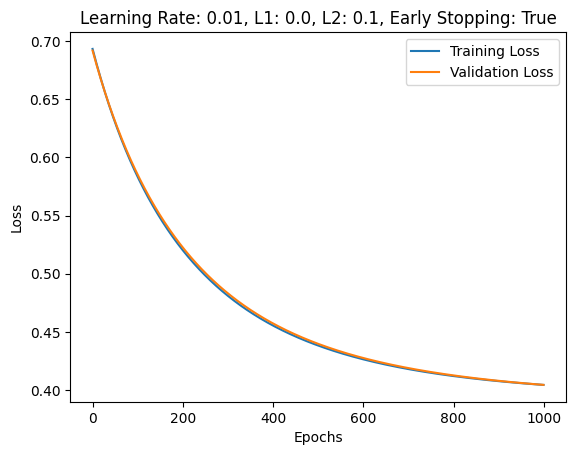


Early stopping at epoch 979


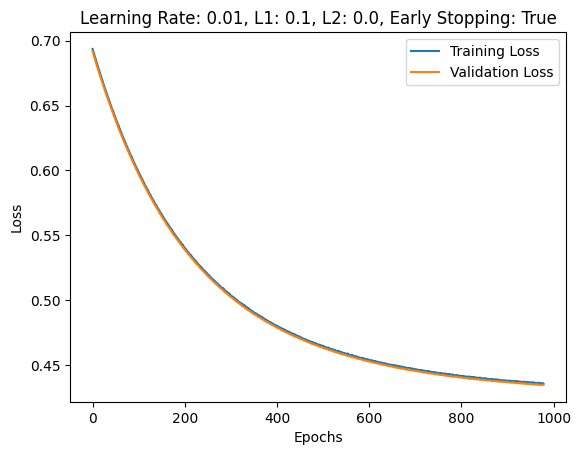

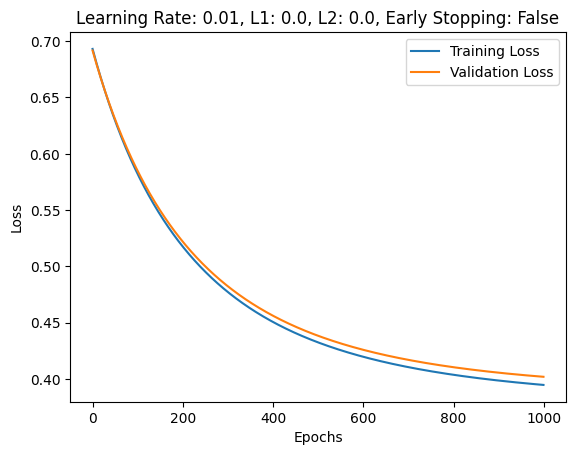

In [ ]:
# Define a function to run the experiments
def run_experiment(learning_rate=0.01, lambda_l1=0.0, lambda_l2=0.0, early_stopping=False):
    weights, bias, train_losses, val_losses = gradient_descent(X_train_scaled, y_train,
                                                               learning_rate=learning_rate,
                                                               lambda_l1=lambda_l1,
                                                               lambda_l2=lambda_l2,
                                                               early_stopping=early_stopping)

    # Plot training and validation losses
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f"Learning Rate: {learning_rate}, L1: {lambda_l1}, L2: {lambda_l2}, Early Stopping: {early_stopping}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Example experiments
run_experiment(learning_rate=0.01, lambda_l1=0.0, lambda_l2=0.1, early_stopping=True)  # With L2 regularization and early stopping
print()
run_experiment(learning_rate=0.01, lambda_l1=0.1, lambda_l2=0.0, early_stopping=True)  # With L1 regularization and early stopping
print()
run_experiment(learning_rate=0.01, lambda_l1=0.0, lambda_l2=0.0, early_stopping=False) # Without regularization and without early stopping


**First and second plot with early stopping**


*   **Observation :** The training and validation losses are very closely aligned throughout the training process. Early stopping ocuurs at 979th iteration when it detects that validation loss is no longer improving,preventing the model from overfitting.
*   **Effect on overfitting :** Since training stops early when validation loss stagnates, thus model is less likely to overfit.

*   **Effect on Generaliztion :** improved generaliztion, as early stopping ensures that model is well-fitted to the training data without overtraining, leading to perform better on unseen data.


---


**Third plot- without early stopping**


*   **Observation :** The training loss continues to decrease as the number of epochs increases, while validation loss starts to deviate slightly from the training loss in later epochs. The validation loss is higher than the training loss, suggesting the model is beginning to overfit, especially at later stages of training.
*   **Effect on Overfiting :** Overfitting is more likely in this case because the model continues to train beyond the point where it perfroms best on validation set. The divergence in validation and training loss suggests that the model is fitting more on training data at expense of performance on unseen data.

* **Effect on Generilization :** Weaker generalization, as model is prone to overfitting, which leads to poor performance on unseen data.





